NEURAL NETWORK BACKPROPAGATION - EXCEL DATASET

1. Loading Data from Excel file...
Dataset berhasil dimuat!
Shape: (359, 10)

Kolom dataset:
['Student_ID', 'Gender', 'Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores', 'Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities', 'Final_Exam_Score', 'Pass_Fail']

Sample data:
  Student_ID  Gender  Study_Hours_per_Week  Attendance_Rate  Past_Exam_Scores  \
0       S147    Male                    31                7                86   
1       S136    Male                    16                8                73   
2       S209  Female                    21                9                74   
3       S458  Female                    27                9                99   
4       S502  Female                    26               10                88   

  Parental_Education_Level Internet_Access_at_Home Extracurricular_Activities  \
0              High School                     Yes                     

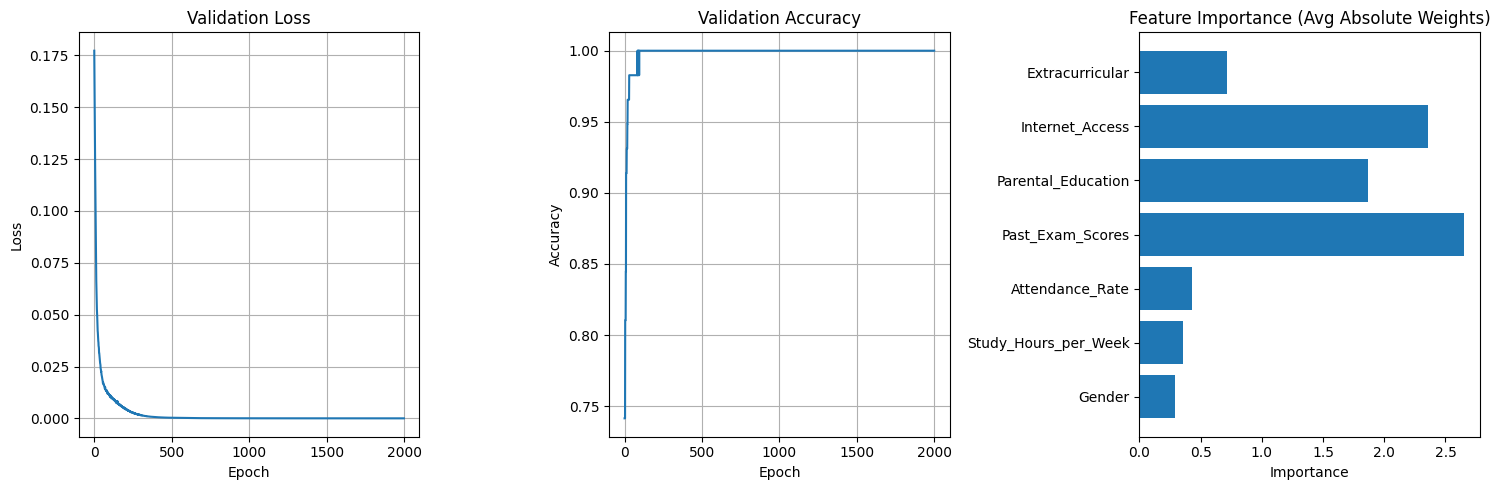


5. Example Prediction...
Sample Student Profile (dari dataset):
  Student ID: S147
  Gender: Male
  Study Hours/Week: 31
  Attendance Rate: 7%
  Past Exam Score: 86
  Parent Education: High School
  Internet Access: Yes
  Extracurricular: Yes
  Final Exam Score: 63
  Actual Result: Pass

Prediction: PASS
Probability of Passing: 1.0000

6. Dataset Analysis...
Total Students: 358
Pass Rate: 74.58%
Average Study Hours: 26.0
Average Attendance: 8.1%
Average Past Scores: 83.7


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

class ImprovedNeuralNetwork:
    """
    Neural Network dengan Backpropagation - Versi Diperbaiki
    Fitur: Momentum, Early Stopping, Mini-batch Training
    """

    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, momentum=0.9):
        self.learning_rate = learning_rate
        self.momentum = momentum

        # Inisialisasi bobot dengan Xavier initialization
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2.0 / input_size)
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2.0 / hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.b2 = np.zeros((1, output_size))

        # Momentum terms
        self.vW1 = np.zeros_like(self.W1)
        self.vW2 = np.zeros_like(self.W2)
        self.vb1 = np.zeros_like(self.b1)
        self.vb2 = np.zeros_like(self.b2)

        # Training history
        self.history = {'loss': [], 'accuracy': []}

    def sigmoid(self, x):
        """Fungsi aktivasi sigmoid dengan clipping untuk stabilitas"""
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        """Turunan sigmoid"""
        return x * (1 - x)

    def forward(self, X):
        """Forward propagation"""
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output):
        """Backward propagation dengan momentum"""
        m = X.shape[0]

        # Output layer error
        dz2 = output - y
        dW2 = (1/m) * np.dot(self.a1.T, dz2)
        db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)

        # Hidden layer error
        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * self.sigmoid_derivative(self.a1)
        dW1 = (1/m) * np.dot(X.T, dz1)
        db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)

        # Update dengan momentum
        self.vW2 = self.momentum * self.vW2 - self.learning_rate * dW2
        self.vb2 = self.momentum * self.vb2 - self.learning_rate * db2
        self.vW1 = self.momentum * self.vW1 - self.learning_rate * dW1
        self.vb1 = self.momentum * self.vb1 - self.learning_rate * db1

        self.W2 += self.vW2
        self.b2 += self.vb2
        self.W1 += self.vW1
        self.b1 += self.vb1

    def train(self, X, y, epochs=1000, batch_size=32, validation_split=0.2, patience=50):
        """
        Training dengan mini-batch dan early stopping
        """
        # Split untuk validasi
        X_train, X_val, y_train, y_val = train_test_split(
            X, y, test_size=validation_split, random_state=42
        )

        best_val_loss = float('inf')
        patience_counter = 0

        for epoch in range(epochs):
            # Mini-batch training
            indices = np.random.permutation(X_train.shape[0])

            for i in range(0, X_train.shape[0], batch_size):
                batch_idx = indices[i:i+batch_size]
                X_batch = X_train[batch_idx]
                y_batch = y_train[batch_idx]

                # Forward dan backward
                output = self.forward(X_batch)
                self.backward(X_batch, y_batch, output)

            # Evaluasi setiap epoch
            train_output = self.forward(X_train)
            val_output = self.forward(X_val)

            train_loss = np.mean((y_train - train_output) ** 2)
            val_loss = np.mean((y_val - val_output) ** 2)

            train_acc = accuracy_score(y_train, (train_output > 0.5).astype(int))
            val_acc = accuracy_score(y_val, (val_output > 0.5).astype(int))

            self.history['loss'].append(val_loss)
            self.history['accuracy'].append(val_acc)

            # Early stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
            else:
                patience_counter += 1

            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch}")
                break

            # Print progress
            if epoch % 100 == 0:
                print(f"Epoch {epoch}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}, Val Acc={val_acc:.4f}")

    def predict(self, X):
        """Prediksi kelas"""
        return (self.forward(X) > 0.5).astype(int)

    def predict_proba(self, X):
        """Prediksi probabilitas"""
        return self.forward(X)

# ============================
# DATA PREPROCESSING
# ============================

def load_student_dataset():
    """Load dan preprocess dataset dari file Excel"""
    try:
        # Load dataset dari file Excel - perbaikan di sini
        df = pd.read_excel('student_performance_dataset.xlsx', sheet_name='Sheet1')
        print("Dataset berhasil dimuat!")
        print(f"Shape: {df.shape}")
        print("\nKolom dataset:")
        print(df.columns.tolist())
        print("\nSample data:")
        print(df.head())

        # Cek missing values
        print(f"\nMissing values:")
        print(df.isnull().sum())

        # PERBAIKAN: Drop rows dengan missing values pada kolom target
        initial_rows = len(df)
        df = df.dropna(subset=['Pass_Fail'])  # Drop rows dengan target missing
        print(f"\nRows dropped due to missing target: {initial_rows - len(df)}")

        # PERBAIKAN: Handle missing values pada feature columns
        numeric_columns = ['Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores', 'Final_Exam_Score']
        for col in numeric_columns:
            if col in df.columns:
                df[col] = df[col].fillna(df[col].median())  # Fill dengan median

        # Fill categorical missing values dengan mode
        categorical_columns = ['Gender', 'Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities']
        for col in categorical_columns:
            if col in df.columns:
                df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'Unknown')

        # Preprocessing
        # 1. Encode categorical variables
        le_gender = LabelEncoder()
        df['Gender_encoded'] = le_gender.fit_transform(df['Gender'])

        # Encode Parental Education Level dengan handling untuk missing values
        education_mapping = {
            'High School': 1,
            'Bachelors': 2,
            'Masters': 3,
            'PhD': 4,
            'Unknown': 0  # Default untuk missing values
        }
        df['Parental_Education_encoded'] = df['Parental_Education_Level'].map(education_mapping)
        df['Parental_Education_encoded'] = df['Parental_Education_encoded'].fillna(0)  # Fallback

        # Encode Yes/No columns dengan handling missing values
        df['Internet_Access_encoded'] = df['Internet_Access_at_Home'].map({'Yes': 1, 'No': 0})
        df['Internet_Access_encoded'] = df['Internet_Access_encoded'].fillna(0)  # Default ke 0

        df['Extracurricular_encoded'] = df['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})
        df['Extracurricular_encoded'] = df['Extracurricular_encoded'].fillna(0)  # Default ke 0

        # Encode target variable
        df['Pass_Fail_encoded'] = df['Pass_Fail'].map({'Pass': 1, 'Fail': 0})

        # PERBAIKAN: Check if target encoding worked
        if df['Pass_Fail_encoded'].isnull().any():
            print("Warning: Some target values couldn't be encoded!")
            print("Unique Pass_Fail values:", df['Pass_Fail'].unique())
            # Drop rows dengan target yang tidak bisa di-encode
            df = df.dropna(subset=['Pass_Fail_encoded'])

        # 2. Select features
        feature_columns = [
            'Gender_encoded',
            'Study_Hours_per_Week',
            'Attendance_Rate',
            'Past_Exam_Scores',
            'Parental_Education_encoded',
            'Internet_Access_encoded',
            'Extracurricular_encoded'
        ]

        # PERBAIKAN: Check if all feature columns exist
        available_features = [col for col in feature_columns if col in df.columns]
        missing_features = [col for col in feature_columns if col not in df.columns]

        if missing_features:
            print(f"Warning: Missing feature columns: {missing_features}")

        X = df[available_features].values
        y = df['Pass_Fail_encoded'].values.reshape(-1, 1)

        # PERBAIKAN: Final check for NaN values
        print(f"\nFinal data check:")
        print(f"NaN in X: {np.isnan(X).sum()}")
        print(f"NaN in y: {np.isnan(y).sum()}")

        # Remove any remaining NaN rows
        valid_mask = ~(np.isnan(X).any(axis=1) | np.isnan(y).flatten())
        X = X[valid_mask]
        y = y[valid_mask]

        print(f"Final clean dataset: {X.shape[0]} samples, {X.shape[1]} features")

        # Feature names untuk referensi
        feature_names = [
            'Gender', 'Study_Hours_per_Week', 'Attendance_Rate',
            'Past_Exam_Scores', 'Parental_Education',
            'Internet_Access', 'Extracurricular'
        ]
        feature_names = feature_names[:len(available_features)]  # Adjust berdasar available features

        print(f"\nDataset siap digunakan:")
        print(f"Jumlah sampel: {X.shape[0]}")
        print(f"Jumlah fitur: {X.shape[1]}")
        print(f"Pass rate: {np.mean(y):.2%}")
        print(f"Features: {feature_names}")

        # Show basic statistics
        print(f"\nStatistik dasar:")
        if 'Gender_encoded' in df.columns:
            print(f"- Gender (Male=1): {np.mean(df['Gender_encoded']):.2f}")
        if 'Study_Hours_per_Week' in df.columns:
            print(f"- Study Hours: {np.mean(df['Study_Hours_per_Week']):.1f} ± {np.std(df['Study_Hours_per_Week']):.1f}")
        if 'Attendance_Rate' in df.columns:
            print(f"- Attendance: {np.mean(df['Attendance_Rate']):.1f}% ± {np.std(df['Attendance_Rate']):.1f}%")
        if 'Past_Exam_Scores' in df.columns:
            print(f"- Past Scores: {np.mean(df['Past_Exam_Scores']):.1f} ± {np.std(df['Past_Exam_Scores']):.1f}")

        return X, y, feature_names, df

    except FileNotFoundError:
        print("Error: File 'student_performance_dataset.xlsx' tidak ditemukan!")
        print("Pastikan file berada di direktori yang sama dengan script ini.")
        return None, None, None, None
    except Exception as e:
        print(f"Error loading dataset: {str(e)}")
        return None, None, None, None

# ============================
# MAIN FUNCTION
# ============================

def main():
    print("=" * 50)
    print("NEURAL NETWORK BACKPROPAGATION - EXCEL DATASET")
    print("=" * 50)

    # 1. Load data dari Excel
    print("\n1. Loading Data from Excel file...")
    X, y, feature_names, df = load_student_dataset()

    if X is None:
        print("Tidak dapat memuat dataset. Program dihentikan.")
        return

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # PERBAIKAN: Additional check sebelum train_test_split
    print(f"\nPre-split check:")
    print(f"X_scaled shape: {X_scaled.shape}")
    print(f"y shape: {y.shape}")
    print(f"Any NaN in X_scaled: {np.isnan(X_scaled).any()}")
    print(f"Any NaN in y: {np.isnan(y).any()}")
    print(f"y unique values: {np.unique(y)}")

    # Train-test split dengan error handling
    try:
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, test_size=0.2, random_state=42, stratify=y
        )
    except Exception as e:
        print(f"Error in train_test_split: {e}")
        print("Trying without stratify...")
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, test_size=0.2, random_state=42
        )

    print(f"Training samples: {X_train.shape[0]}")
    print(f"Test samples: {X_test.shape[0]}")
    print(f"Features: {X_train.shape[1]}")

    # 2. Create and train model
    print("\n2. Training Neural Network...")
    model = ImprovedNeuralNetwork(
        input_size=X_train.shape[1],
        hidden_size=10,
        output_size=1,
        learning_rate=0.01,
        momentum=0.9
    )

    # Train with early stopping
    model.train(X_train, y_train, epochs=2000, batch_size=8, patience=100)

    # 3. Evaluate model
    print("\n3. Model Evaluation...")

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, test_pred, target_names=['Fail', 'Pass']))

    # 4. Visualize results
    print("\n4. Training Visualization...")

    plt.figure(figsize=(15, 5))

    # Loss plot
    plt.subplot(1, 3, 1)
    plt.plot(model.history['loss'])
    plt.title('Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)

    # Accuracy plot
    plt.subplot(1, 3, 2)
    plt.plot(model.history['accuracy'])
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)

    # Feature importance visualization
    plt.subplot(1, 3, 3)
    # Ambil rata-rata bobot absolut dari layer pertama
    feature_importance = np.mean(np.abs(model.W1), axis=1)
    plt.barh(feature_names, feature_importance)
    plt.title('Feature Importance (Avg Absolute Weights)')
    plt.xlabel('Importance')

    plt.tight_layout()
    plt.show()

    # 5. Example prediction dengan data dari Excel
    print("\n5. Example Prediction...")

    # Ambil contoh siswa pertama dari dataset
    sample_student = X_scaled[0:1]  # Ambil sample pertama

    prediction = model.predict(sample_student)[0][0]
    probability = model.predict_proba(sample_student)[0][0]

    print("Sample Student Profile (dari dataset):")
    if 'Student_ID' in df.columns:
        print(f"  Student ID: {df.iloc[0]['Student_ID']}")
    if 'Gender' in df.columns:
        print(f"  Gender: {df.iloc[0]['Gender']}")
    if 'Study_Hours_per_Week' in df.columns:
        print(f"  Study Hours/Week: {df.iloc[0]['Study_Hours_per_Week']:.0f}")
    if 'Attendance_Rate' in df.columns:
        print(f"  Attendance Rate: {df.iloc[0]['Attendance_Rate']:.0f}%")
    if 'Past_Exam_Scores' in df.columns:
        print(f"  Past Exam Score: {df.iloc[0]['Past_Exam_Scores']:.0f}")
    if 'Parental_Education_Level' in df.columns:
        print(f"  Parent Education: {df.iloc[0]['Parental_Education_Level']}")
    if 'Internet_Access_at_Home' in df.columns:
        print(f"  Internet Access: {df.iloc[0]['Internet_Access_at_Home']}")
    if 'Extracurricular_Activities' in df.columns:
        print(f"  Extracurricular: {df.iloc[0]['Extracurricular_Activities']}")
    if 'Final_Exam_Score' in df.columns:
        print(f"  Final Exam Score: {df.iloc[0]['Final_Exam_Score']:.0f}")
    print(f"  Actual Result: {df.iloc[0]['Pass_Fail']}")

    result = "PASS" if prediction == 1 else "FAIL"
    print(f"\nPrediction: {result}")
    print(f"Probability of Passing: {probability:.4f}")

    # Analisis tambahan
    print("\n6. Dataset Analysis...")
    print(f"Total Students: {len(df)}")
    print(f"Pass Rate: {(df['Pass_Fail'] == 'Pass').mean():.2%}")
    if 'Study_Hours_per_Week' in df.columns:
        print(f"Average Study Hours: {df['Study_Hours_per_Week'].mean():.1f}")
    if 'Attendance_Rate' in df.columns:
        print(f"Average Attendance: {df['Attendance_Rate'].mean():.1f}%")
    if 'Past_Exam_Scores' in df.columns:
        print(f"Average Past Scores: {df['Past_Exam_Scores'].mean():.1f}")

if __name__ == "__main__":
    main()